In [63]:
import pyodbc
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
# Establish connection to the AdventureWorks2022 database
connection = pyodbc.connect(r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=[Server Name];'
    r'DATABASE=AdventureWorks2022;'
    r'Trusted_Connection=yes;'
    r'TrustServerCertificate=yes;')


In [10]:
# SQL Query to retrieve and aggregate revenue data
query = """
SELECT SD.CountryRegionName as Country, SUM(SW.AnnualRevenue) AS Revenue
FROM Sales.vStoreWithAddresses as SD
JOIN Sales.vStoreWithDemographics as SW
ON SD.BusinessEntityID=SW.BusinessEntityID
GROUP BY CountryRegionName
ORDER BY Revenue DESC;
"""
 
# Execute the query and load the results into a DataFrame
df = pd.read_sql(query, connection)
# Print the data to verify
print(df) 


          Country     Revenue
0   United States  68980000.0
1          Canada  18040000.0
2  United Kingdom   6800000.0
3          France   6650000.0
4       Australia   6420000.0
5         Germany   5900000.0


C:\Users\rache\AppData\Local\Temp\ipykernel_22628\1033657113.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [11]:
df['RevenueMill']=df['Revenue']/1000000

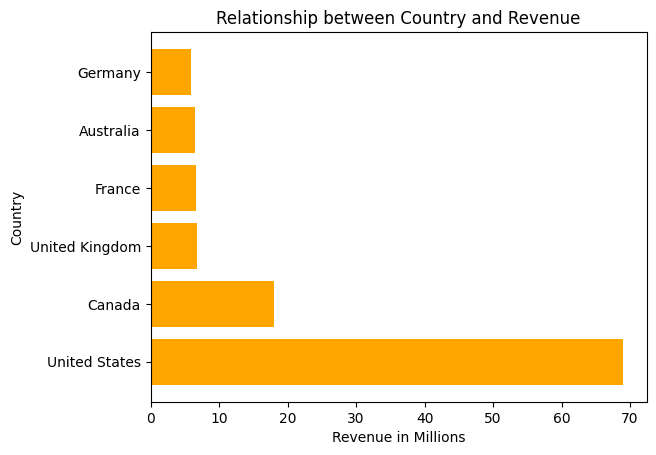

In [12]:
# Create a bar chart
plt.barh(df['Country'], df['RevenueMill'], color='orange')
plt.title("Relationship between Country and Revenue")
plt.ylabel("Country")
plt.xlabel("Revenue in Millions")
plt.show()


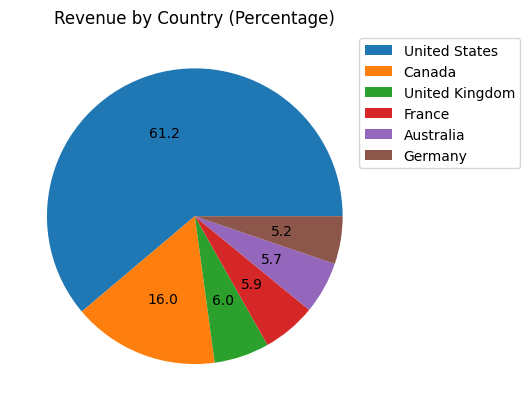

In [78]:
plt.pie(df['Revenue'], autopct='%0.1f')
plt.legend(df['Country'], loc='upper right', bbox_to_anchor=(1.4, 1))
plt.title('Revenue by Country (Percentage)')
plt.show()


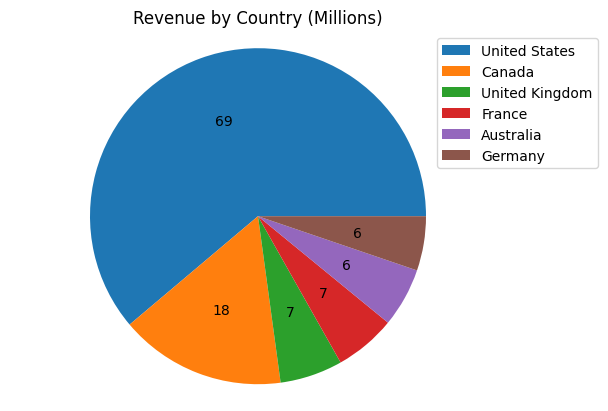

In [79]:
labels = df['Country']
sizes = df['RevenueMill']

def absolute_value(val):
    a  = int(np.round(val/100.*sizes.sum(), 0))
    return a

plt.pie(df['RevenueMill'], autopct=absolute_value)
plt.legend(df['Country'], loc='upper right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.title("Revenue by Country (Millions)")
plt.show()